# Praca domowa 7 
### Jakub Wiśniewski

Tematem pracy domowej jest kompresja obrazów za pomocą pca. Obraz który będę przerabiał ilustruje osobę, której (mam nadzieję) nie trzeba przedstawiać. 


## PCA 

In [179]:
import time
import warnings
from sys import getsizeof

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg 

warnings.filterwarnings('ignore')

Na początku wczytam zdjęcie, aby było jak najmniejsze. Oryginalnie ten moduł matplot wczytuje zdjęca jakoo floaty między 0 a 1. Dużo lepsze w przypadku zdjęć wydaje się przedstawiać je jako int między 0 a 255. Dokłanie taki "range" ma `uint8`

In [180]:
img = mpimg.imread("img/michael.png")
img_array = np.array(img)
old = getsizeof(img_array)
print(f'Before: {getsizeof(img_array)}')
img_array = img_array*255
img_array = np.array(img_array, dtype = 'uint8')
print(f'After: {getsizeof(img_array)}')

print(f'Ratio: {old/getsizeof(img_array)}')

Before: 10342784
After: 2585792
Ratio: 3.9998514961760265


Po przekształceniu otrzymaliśmy 4 razy mniejszą wielkość pliku.

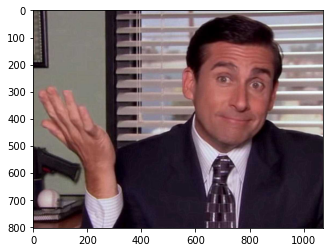

In [181]:
plt.imshow(img_array)

In [182]:
def compress_pca(img_array, n_components, pca_dtype):
    """
    Funkcja kompresuje zdjecie za pomoca PCA, każdy kanał oddzielnie,
    następnie rekonstruuje z PCA do zwykłego zdjęcia.
    Na koniec zwraca 2 ndarray'e jeden z PCA, a drugi ze zrekonstruowanym zdjęciem
    """
    dtype_org = img_array.dtype
    
    original_shape = img_array.shape
    img_reshaped = np.reshape(img_array, (original_shape[0],original_shape[1] * original_shape[2]))
    
    pca = PCA(n_components=n_components)
    
    # transforming with pca
    X_pca = np.array(pca.fit_transform(img_reshaped), dtype = pca_dtype)

    X_reconstructed = np.reshape(pca.inverse_transform(X_pca),
                                 (original_shape[0],original_shape[1],original_shape[2]))
    
    # uint8 does not work here, leaves different colors on photo and i dont ktow why
    # if you want to check what i mean, change dtype to uint8 and look at photos below
    X_reconstructed = np.array(X_reconstructed, dtype = 'int16')

    return X_pca, X_reconstructed

## Wyniki

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0.98, 'Number of principal components in photo reconstruction')

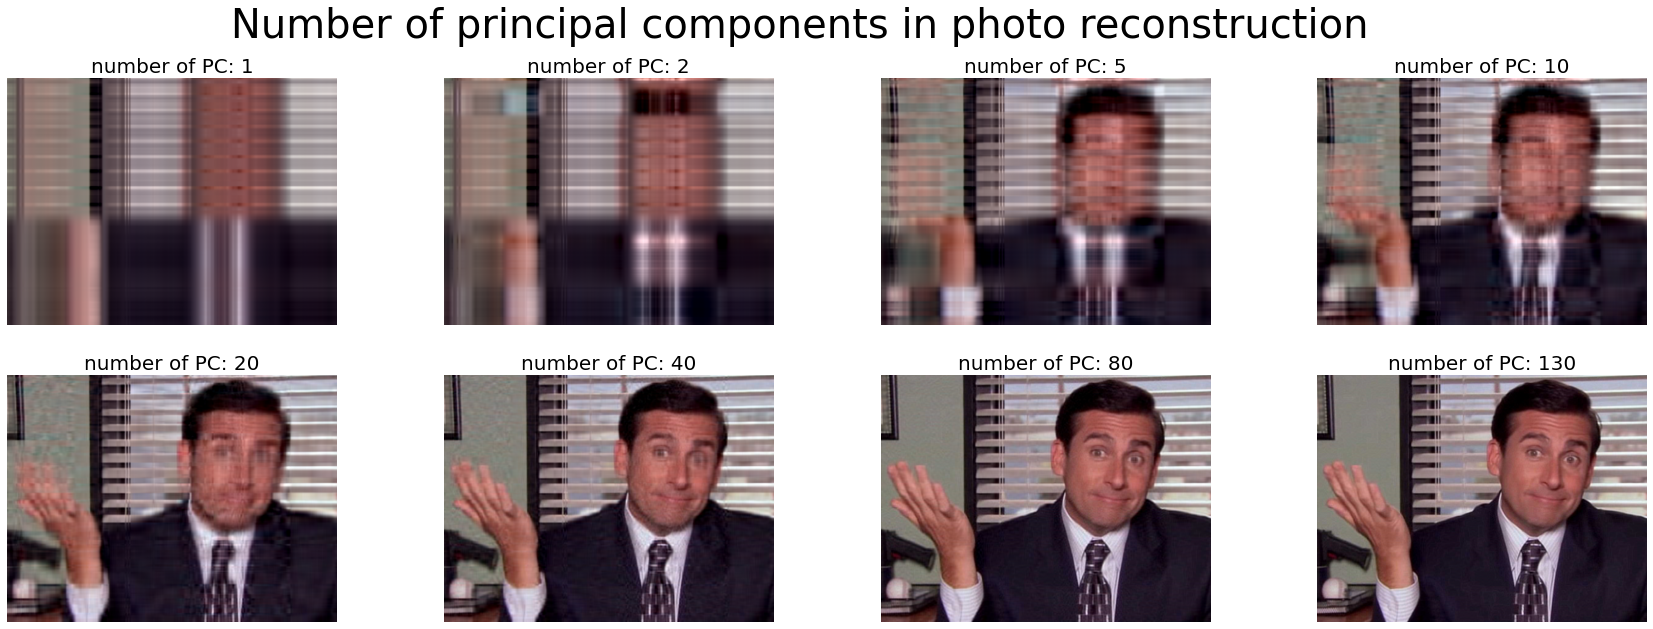

In [183]:
plt.figure(figsize=(30, 10))
plt.subplot(241)
j = 0
for i in [1, 2, 5, 10, 20, 40, 80, 130]:
    X_pca, X_reconstructed = compress_pca(img_array, n_components=i, pca_dtype= np.float64)
    plt.subplot(241 + j)
    plt.imshow(X_reconstructed)
    plt.axis('off')
    plt.title(f"number of PC: {i}", size=20)
    j += 1

plt.suptitle("Number of principal components in photo reconstruction", size=40)

Jak widać już dla pierwszego zdjęcia możemy odczytać kilka informacji. Jest tam ktoś w garniturze. Dla 2-5 komponentów można już zobaczyć że ta osoba prawdopodobnie trzyma rękę w górze. Dla 20 PC już można odczytać kto widnieje na zdjęciu. Z kolei dla 40 i więcej obrazek jest w 100% odczytywalny, a wraz ze zwiększaniem się liczby kompoentów jakość również się zwiększa, ale już nie tak diametralnie.

In [184]:
img_array.dtype

dtype('uint8')

In [185]:
n_components = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    15, 20, 25, 50, 100, 200, 300,
    400, 500, 600, 700, 800
]

relative_size = []
for i in n_components:
    X_pca, X_reconstructed = compress_pca(img, n_components=i, pca_dtype=np.float64)
    rs = getsizeof(X_pca) / getsizeof(img_array)
    relative_size.append(rs)

### Kompresja

Text(0.5, 1.0, 'Compression ratio and number of PC')

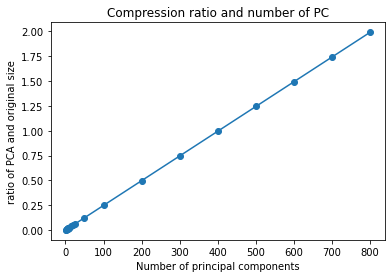

In [186]:
plt.plot(n_components, relative_size)
plt.scatter(n_components, relative_size)
plt.ylabel("ratio of PCA and original size")
plt.xlabel("Number of principal components")
plt.title("Compression ratio and number of PC")

Jakość kompresji jest zależna liniowo od ilości komponentów, wydaje się to logiczne.
Jakość kompresji jest znacząca dla mniejszych (< 200) ilości komponentów. Gdy zwiększamy tę liczbę kompresja wydaje się być bezsensowna, gdyż przekraczamy wielkość oryginalnego obrazka. Prawdopodobnie dzieje się tak, gdyż w `numpy` `ndarray` ma swój konkretny `dtype` (w przeciwieństwie do listy w pythonie). Oryginalny obrazek potrzebuje tylko `uint8` czyli ośmio bitowych intów. Z kolei PCA, jako że liczby mogą być zmiennoprzecinkowe posiada oryginalnie `float64`. Co by się stało, gdybyśmy zmienili `float64` na `int16` w PCA? Czy zdjęcia zmieniłyby diametralnie swoją jakość? 


Text(0.5, 1.0, 'Compression ratio and number of PC')

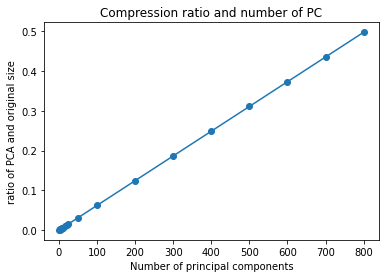

In [187]:

relative_size = []
for i in n_components:
    X_pca, X_reconstructed = compress_pca(img, n_components=i, pca_dtype= np.int16)
    rs = getsizeof(X_pca) / getsizeof(img_array)
    relative_size.append(rs)

plt.plot(n_components, relative_size)
plt.scatter(n_components, relative_size)
plt.ylabel("ratio of PCA and original size")
plt.xlabel("Number of principal components")
plt.title("Compression ratio and number of PC")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0.98, 'Number of principal components in photo reconstruction')

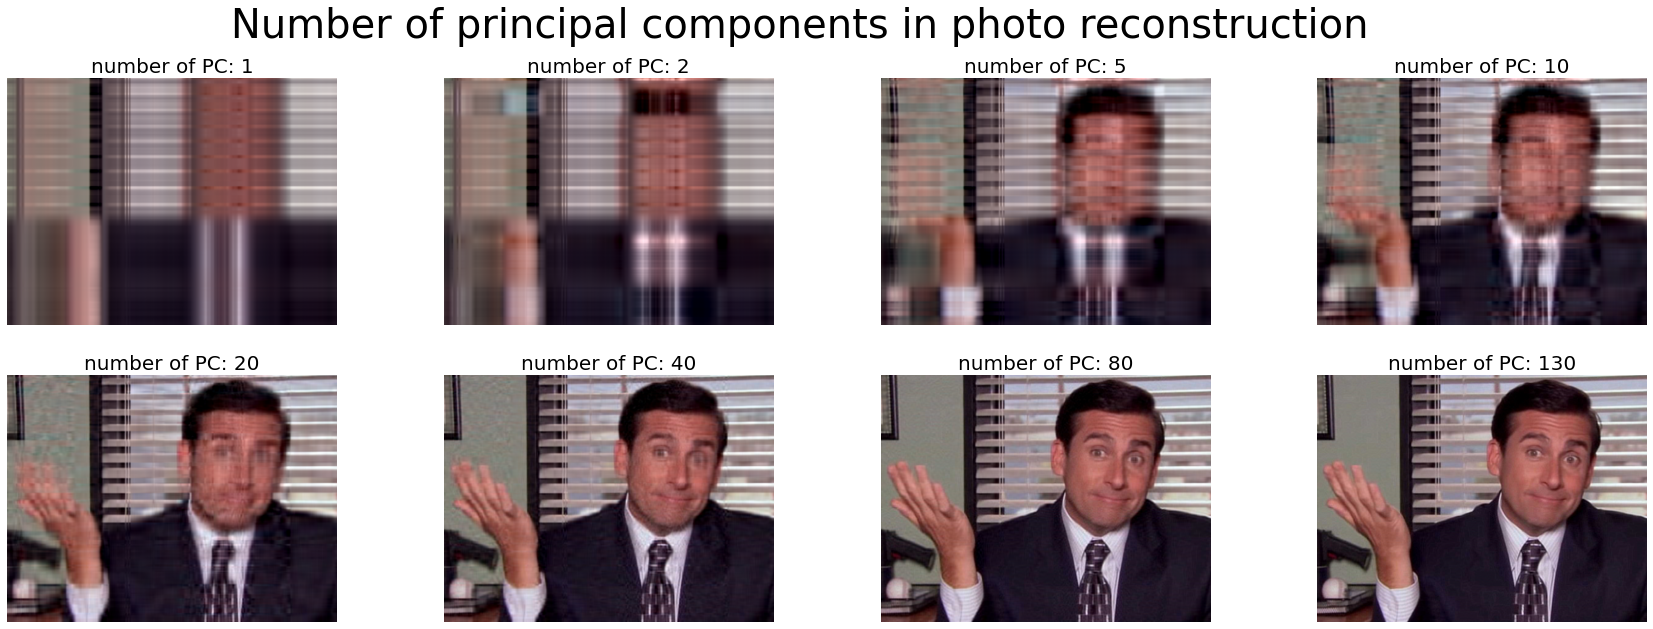

In [188]:
plt.figure(figsize=(30, 10))
plt.subplot(241)
j = 0
for i in [1, 2, 5, 10, 20, 40, 80, 130]:
    X_pca, X_reconstructed = compress_pca(img_array, n_components=i, pca_dtype= np.int16)
    plt.subplot(241 + j)
    plt.imshow(X_reconstructed)
    plt.axis('off')
    plt.title(f"number of PC: {i}", size=20)
    j += 1

plt.suptitle("Number of principal components in photo reconstruction", size=40)

Kompresja jest dużo lepsza, a zdjęcia nie wydają się być wcale gorsze (choć na pewno przy większej rozdzielczości widać byłoby różnicę) Biorąc przykład `PC = 80` jako pierwszy obrazek bez dużych strat jakości, zobaczymy ile razy zmniejszył swoją wielkość. 

In [189]:
X_pca, X_reconstructed = compress_pca(img, n_components= 80, pca_dtype=np.int16)
size_ratio = getsizeof(img_array)/getsizeof(X_pca) 

print(f'Wielkość po przekonwertowaniu przez PCA zmniejszyła się {size_ratio} razy')

Wielkość po przekonwertowaniu przez PCA zmniejszyła się 20.083509382378526 razy


## Wnioski 
PCA jest świetnym sposobem kompresji obrazków. Przy umiejętnym jej zastosowaniu obraz może kilkudziesięcio krotnie zmniejszyć swój rozmiar przy pomijalnej stracie jakości. 

# Bonus

In [251]:
from sklearn.decomposition import FastICA

`ICA` - Independent component analysis to algorytm stosowany np w *cocktail party problem*, czyli w sytuacji nakładania się na siebie wielu sygnałów. Przetestujemy go na ramce danych `signals.tsv`

In [252]:
signals = pd.read_csv("../../signals.tsv", sep = '\t')
signals.head()

,time,signal1,signal2,signal3,signal4
0,0,0.493428,0.078710,-1.314636,1.193460
1,1,0.524618,0.791259,-1.321386,-0.075256
2,2,-0.024396,1.064251,-1.582284,0.785229
3,3,0.219586,1.007421,-1.481651,0.193773
4,4,0.426865,0.943133,-1.521795,-0.433458


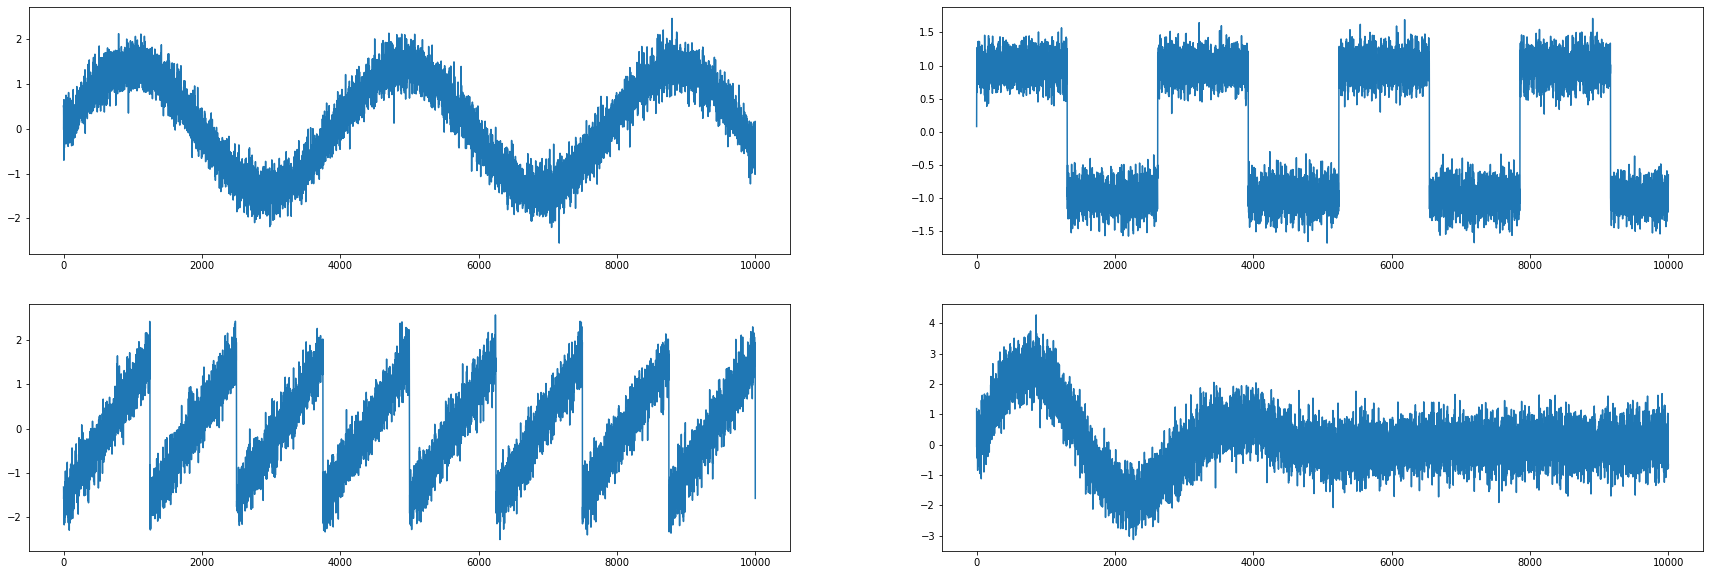

In [253]:
plt.figure(figsize=(30, 10))
plt.subplot(221)
plt.subplot(221)
plt.plot(signals.time,  signals.signal1)
plt.subplot(222)
plt.plot(signals.time,  signals.signal2)
plt.subplot(223)
plt.plot(signals.time,  signals.signal3)
plt.subplot(224)
plt.plot(signals.time,  signals.signal4)


In [254]:
fastica = FastICA(n_components=4, random_state= 42)
signals14 = signals.iloc[:,1:5]

sig_transformed = fastica.fit_transform(signals14)
sig_transformed = pd.DataFrame(sig_transformed).rename(
    columns = {0:'signal1',
               1:'signal2',
               2:'signal3',
               3:'signal4',})
sig_transformed['time'] = signals.time
sig_transformed.head()

,signal1,signal2,signal3,signal4,time
0,-0.010417,0.000529,0.006539,0.012190,0
1,0.006030,0.007008,0.003120,0.012808,1
2,-0.005411,0.010269,-0.000102,0.015388,2
3,0.002163,0.009365,0.000804,0.014496,3
4,0.009822,0.008371,0.001449,0.015057,4


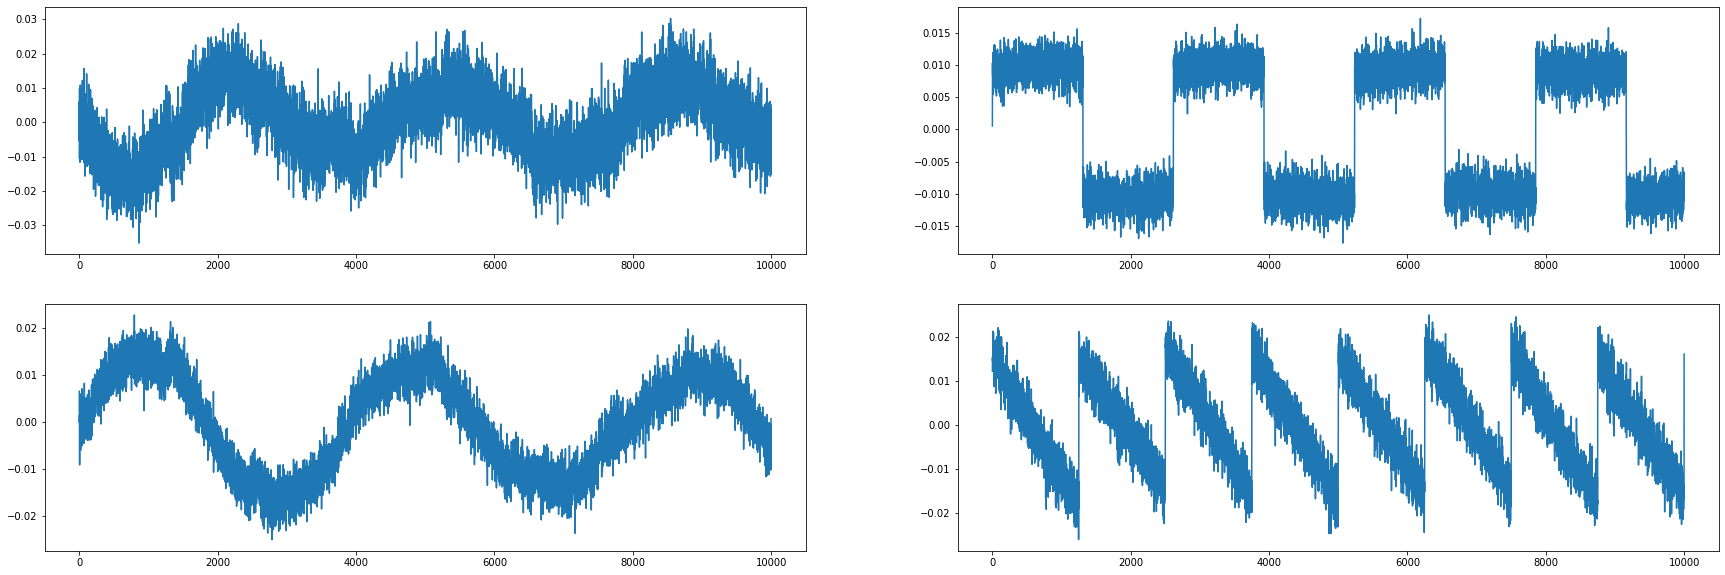

In [255]:
plt.figure(figsize=(30, 10))
plt.subplot(221)
plt.subplot(221)
plt.plot(sig_transformed.time,  sig_transformed.signal1)
plt.subplot(222)
plt.plot(sig_transformed.time,  sig_transformed.signal2)
plt.subplot(223)
plt.plot(sig_transformed.time,  sig_transformed.signal3)
plt.subplot(224)
plt.plot(sig_transformed.time,  sig_transformed.signal4)

Kolumny wydają się być pomieszane, zmienimy ich nazwy

In [256]:
sig_transformed = sig_transformed.rename(columns = {"signal1": "signal4",
                                                      "signal3":"signal1",
                                                      "signal4":"signal3"})

Przeskalujmy te sygnały, aby były bardziej podobne do tych z ramki danych

In [257]:
sig1 = max(signals.signal1)/max(sig_transformed.signal1)
sig2 = max(signals.signal2)/max(sig_transformed.signal2)
sig3 = max(signals.signal3)/max(sig_transformed.signal3)
sig4 = max(signals.signal4)/max(sig_transformed.signal4)

sig_transformed.signal1 = sig_transformed.signal1 *sig1
sig_transformed.signal2 = sig_transformed.signal2 *sig2
sig_transformed.signal3 = sig_transformed.signal3 *sig3
sig_transformed.signal4 = sig_transformed.signal4 *sig4



In [259]:
sig_transformed["type"] = "decoded"
signals["type"] = "original"

In [260]:
all_signals = pd.concat([signals,sig_transformed])

In [261]:
import seaborn as sns

Text(0.5, 0.98, 'Signals compared')

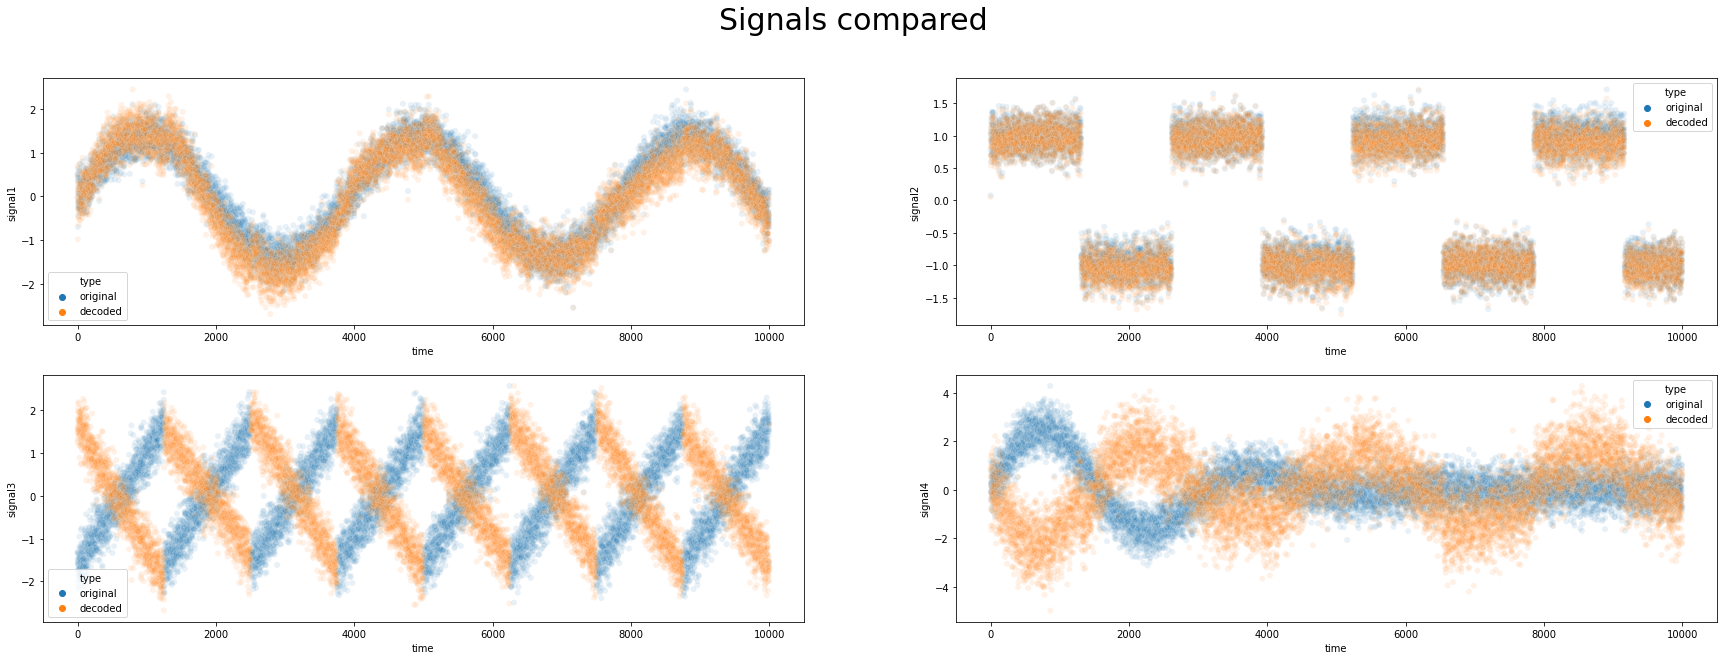

In [264]:
plt.figure(figsize=(30, 10))
plt.subplot(221)
plt.subplot(221)
sns.scatterplot(data = all_signals, x = "time", y = "signal1", hue = "type",alpha=0.1)
plt.subplot(222)
sns.scatterplot(data = all_signals, x = "time", y = "signal2", hue = "type",alpha=0.1)
plt.subplot(223)
sns.scatterplot(data = all_signals, x = "time", y = "signal3", hue = "type",alpha=0.1)
plt.subplot(224)
sns.scatterplot(data = all_signals, x = "time", y = "signal4", hue = "type",alpha=0.1)

plt.suptitle("Signals compared", size = 30)

## Wnioski

Najbardziej zmieszany wydawał się być sygnał 4. Po zastosowaniu `ICA` sygnał 4 okazał się być bardziej sinusoidalny. Sygnał 3 z kolei odwrócił się.

## Oświadczenie

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu "Wstęp do Uczenia Maszynowego" została wykonana przeze mnie samodzielnie.

~Jakub Wiśniewski 298850